In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
data =  pd.read_csv('iris.data', header=None)
data.columns = ['Sepal Length','Sepal Width','Petal Length','Petal Width','Type']
data

,Sepal Length,Sepal Width,Petal Length,Petal Width,Type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


array([[<AxesSubplot:title={'center':'Sepal Length'}>,
        <AxesSubplot:title={'center':'Sepal Width'}>],
       [<AxesSubplot:title={'center':'Petal Length'}>,
        <AxesSubplot:title={'center':'Petal Width'}>]], dtype=object)

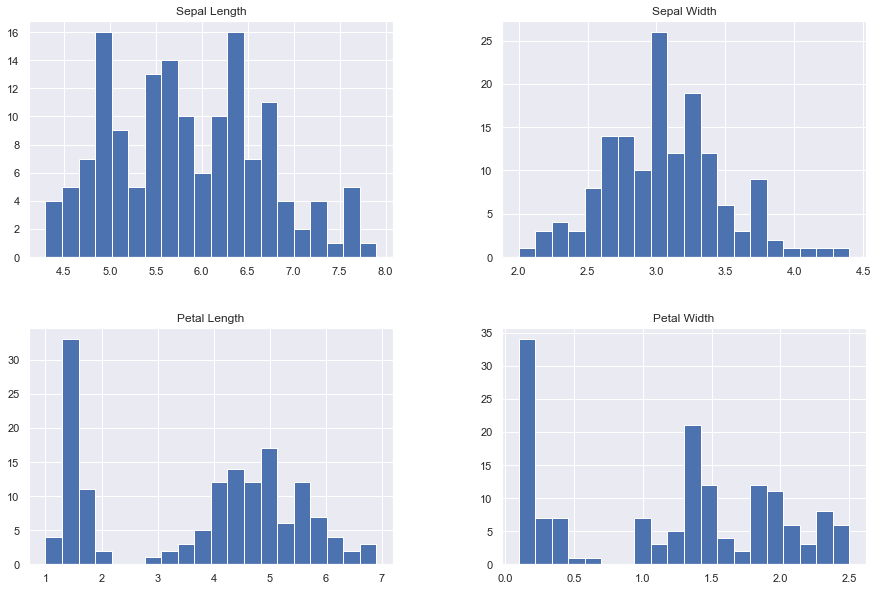

In [4]:
data.hist(figsize=(15,10),
           bins = 20)

In [5]:
x = data.drop('Type', axis=1)
y = data['Type']

In [6]:
from sklearn.model_selection import train_test_split

x_treino,x_teste,y_treino,y_teste  = train_test_split(x,y, test_size=0.3)

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
model_cl = RandomForestClassifier(bootstrap=True,
                                  criterion='gini',
                                  n_jobs=-1,
                                  max_depth=3,
                                  n_estimators = 1000,
                                  max_features='auto',
                                  min_samples_leaf = 1,
                                  min_samples_split = 2,
                                 oob_score=True)

model_cl.fit(x_treino,y_treino)

RandomForestClassifier(max_depth=3, n_estimators=1000, n_jobs=-1,
                       oob_score=True)

In [11]:
y_pred_treino = model_cl.predict(x_treino)
y_pred_teste  = model_cl.predict(x_teste)

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

In [15]:
print(confusion_matrix(y_teste,y_pred_teste))
print("--------------------------")
print("Base de Teste")
print(classification_report(y_teste,y_pred_teste))

[[18  0  0]
 [ 0 14  0]
 [ 0  1 12]]
--------------------------
Base de Teste
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.93      1.00      0.97        14
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [16]:
print(confusion_matrix(y_treino,y_pred_treino))
print("--------------------------")
print("Base de Treino")
print(classification_report(y_treino,y_pred_treino))

[[32  0  0]
 [ 0 34  2]
 [ 0  2 35]]
--------------------------
Base de Treino
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        32
Iris-versicolor       0.94      0.94      0.94        36
 Iris-virginica       0.95      0.95      0.95        37

       accuracy                           0.96       105
      macro avg       0.96      0.96      0.96       105
   weighted avg       0.96      0.96      0.96       105



In [21]:
importancias = pd.Series(dict(zip(model_cl.feature_names_in_,model_cl.feature_importances_)))
importancias

Sepal Length    0.093827
Sepal Width     0.017891
Petal Length    0.447501
Petal Width     0.440780
dtype: float64